In [1]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint

import numpy as np
import torch
import json
import pandas as pd
import glob
import os

import tweepy
import sys
import jsonpickle

In [2]:
api_key = '02GS3Mo7IkbOZzHlkjMVXLaxh'
api_secret = '50o182mornUFvpVJU36ij9zueUvfQMPOa3wz8jabYbzw3cIEyO'
# Replace the API_KEY and API_SECRET with your application's key and secret.
auth = tweepy.AppAuthHandler(api_key, api_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
 
if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)

In [8]:
#!pwd
troll_dir = '~/Documents/Coding/Harvard/ac209a_abhimanyu_talwar/content/projects/Twitter/data/russian-troll-tweets/'
main_dir = 'C:/Users/Abhimanyu/Documents/Coding/Harvard/ac209a_abhimanyu_talwar/content/projects/Twitter/data'

In [12]:
all_file = 'first-debate.txt'
all_ids = []
with open(os.path.join(main_dir, all_file), 'r') as f:
    all_ids = f.read().splitlines()
len(all_ids)

3183202

In [39]:
def getTweetsByID(tweet_ids):
    count = len(tweet_ids)
    result = []
    for i in range(int(count/100) + 1):
        try:
            tmp = api.statuses_lookup(tweet_ids[i*100:(i+1)*100])
            result += tmp
        except tweepy.TweepError:
            continue
    print('Downloaded {} tweets.'.format(len(result)))
    return result

def getTextFromStatus(status_list):
    result = [s.text for s in status_list]
    return result

In [120]:
num_tweets = 15000
tweet_ids = list(np.array(all_ids)[np.random.choice(np.arange(len(all_ids)), size=num_tweets, replace=False)])
result = getTweetsByID(tweet_ids)

Downloaded 10131 tweets.


In [121]:
random_tweets = getTextFromStatus(result)

In [255]:
allFiles = [troll_dir + "/IRAhandle_tweets_10.csv"]
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    list_.append(df)
data = pd.concat(list_)

C:\Users\Abhimanyu\Miniconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
data.shape

(243891, 21)

In [256]:
data['publish_date'].unique()

array(['2/16/2016 23:15', '2/16/2016 5:41', '2/16/2016 6:10', ...,
       '12/21/2016 9:23', '12/22/2015 0:11', '12/22/2015 0:30'],
      dtype=object)

In [44]:
data.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1'],
      dtype='object')

In [45]:
data['author'].unique()

array(['10_GOP', '1488REASONS', '1D_NICOLE_', '1ERIK_LEE', '1LORENAFAVA1',
       '2NDHALFONION', '459JISALGE', '4EVER1937', '4EVER_SUSAN',
       '4MYSQUAD', '5EMEN5EMENICH', '5L5_5L5', '666STEVEROGERS', '6DRUZ',
       '71BILALJAMIL1', 'AAASSSSSHHH', 'AAATEST1234', 'AAAVADAKEDAVRAA',
       'AAGN1AA', 'AANTIRACIST', 'AARONALLENALL', 'AARON_M1TCHELL',
       'ABALAKOVAYLIA', 'ABBASSHUKRI', 'ABBYLOPTRT', 'ABELLABAB',
       'ABIGAILCALLME', 'ABIGAILSSILK', 'ABIISSROSB', 'ABISADMASST',
       'ABMERRLINS', 'ABOUTPOLIT', 'ABRAMSREBEKAH', 'ABUNUWASA',
       'ABU_UBAIDA2', 'ACAB_ZONE', 'ACAPARELLA', 'ACEJINEV',
       'ACHSAHORKHAN', 'ACTIVEMIKR', 'ADALESTRTM', 'ADAMCHAPMANJR',
       'ADAMMA_DEFOND', 'ADAM_MATHISSS', 'ADDIE_HOL', 'ADELE_BROCK',
       'ADELIINESTRT', 'ADELINE_GS', 'ADELISTRTT', 'ADKEZLATE',
       'ADLEESTTT', 'ADLEESWOD', 'ADNNELSTR', 'ADRGREERR', 'ADRIANAMFTTT',
       'ADRIASNSS', 'ADRIENNE_GG', 'ADRI_LOW_R', 'AESPARZZA', 'AFEELIUTR',
       'AFIFYAMIRA1', 'AFONIA_ZHI

In [187]:
num_per_user = [np.sum(data['author'] == x) for x in data['author'].unique()]

In [191]:
indices = np.argsort(-np.array(num_per_user))

In [194]:
idx_list = indices[(np.array(num_per_user)[indices] > 400) & (np.array(num_per_user)[indices] < 700)]

In [197]:
data['author'].unique()[idx_list]

array(['ANOSSOVV', 'ARGENTINACATLE1', 'ANGTHEESTR', 'ANDEERLWR',
       'ARTYRTOLSTOV', 'ANATOLINEMCOV', '5EMEN5EMENICH', 'ASHLEEYWES',
       'ARTUR__2014', 'ANNIJONSTR', 'AGATA_ALEXEEVA', 'ANGISDOOYL',
       'AHNORDYK', 'ACAPARELLA', 'ANYA_ISA1282', 'ANISACRRUTR',
       'ANTONFROMSPB', 'ANTONRUMSS', 'AAAVADAKEDAVRAA', 'ANJELICAFAMOUS',
       'ANDRREETRT', 'ANORAVERD', 'ANNY_DUBI', 'ARKHIPOVICHIVNA',
       'ABMERRLINS', 'ALINALINKI_', 'ARINA_RONDAL', 'ARONS_KWENDE',
       'ANTYSHEVALIDA', 'ALINANOVIKOV022', 'AAGN1AA', 'ANDRIYCCCP',
       'ALISONDAVOL', 'ANDREBAKIN', 'ANASTASIAR777', 'ALTMANCOON',
       'ALENAZELDINA', 'ARESTOVEVG', 'ANGELINADARCY_', 'ANGELIKOROTKOVA',
       'ANN__BOGDANOVA', 'ALISA_FRATKINA', 'ALINAVIATKOVA',
       'ANGELIKAMUSI', 'ANGELINALADOVA', 'ANNA_VYSOKAYA', 'ALLAHOMORE',
       '5L5_5L5', 'AFONINMIXAIL', 'ANFISAMICKEY', 'AFRICAVSERDCE',
       'ABALAKOVAYLIA', 'AFONIA_ZHILCOV', 'ANBIVALENTNAYA',
       'ALEXXBELYAEV', 'ARISGRAYS', 'AMERICANALBERT', 'A

In [205]:
users_list = ['ANGTHEESTR', 'ANNIJONSTR', 'ASHLEEYWES']
troll_tweets = [list(data.loc[data['author'] == author_name, 'content'].values) for author_name in users_list]

In [207]:
troll_tweets[1][0:5]

["RT ScottPresler: So, Hillary Clinton can delete 33,000 emails, have 13 mobile devices smashed &amp; FBI won't raid her home.  Democrat privileg…",
 '#joness ANOTHER Islamic Migrant Charged For Trying to Help ISIS in Murder Plot https://t.co/X5XTyunJAr https://t.co/Z8lvklNT2f',
 '#joness De Blasio’s Former Aide Just Spilled The Beans on his Former Boss https://t.co/LZbI0BDiUM https://t.co/TrqimiquQu',
 '#joness BREAKING : McMaster Has Ties to SHARIA LAW Controlled Donors https://t.co/odF6Y6ozvy https://t.co/OQzuqcXB4z',
 '#joness CNN Forced to Report BLISTERING Analysis of REELING Dem Party https://t.co/fzXfw1IYp3 https://t.co/9X9EBz475u']

## Load model

In [48]:
# Load model
from models import InferSent
model_version = 1
MODEL_PATH = "../encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

In [49]:
# Keep it on CPU or put it on GPU
use_cuda = False
model = model.cuda() if use_cuda else model

In [50]:
# If infersent1 -> use GloVe embeddings. If infersent2 -> use InferSent embeddings.
W2V_PATH = '../dataset/GloVe/glove.840B.300d.txt' if model_version == 1 else '../dataset/fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [53]:
# Load embeddings of K most frequent words
model.build_vocab_k_words(K=100000)

Vocab size : 100000


In [54]:
def getEmbeddings(sentences):
    embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
    print('nb sentences encoded : {0}'.format(len(embeddings)))
    return embeddings

## Load sentences

In [208]:
troll_embed = [getEmbeddings(x) for x in troll_tweets]

Nb words kept : 7223/10659 (67.8%)
Speed : 55.1 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 659
Nb words kept : 6061/8775 (69.1%)
Speed : 66.6 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 570
Nb words kept : 6679/9422 (70.9%)
Speed : 64.0 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 596


In [147]:
random_embed = getEmbeddings(random_tweets)

Nb words kept : 125651/178934 (70.2%)
Speed : 60.4 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 10131


In [209]:
all_tweets = np.vstack(troll_embed + [random_embed])

In [210]:
all_tweets.shape

(11956, 4096)

In [211]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca.fit(all_tweets)
print(pca.explained_variance_ratio_)

[0.248574   0.06210489]


In [212]:
tfm_all_tweets = pca.transform(all_tweets)
tfm_all_tweets.shape

(11956, 2)

In [62]:
# tfm_test = pca.transform(test_embed)

In [224]:
troll1 = len(troll_tweets[0])
troll2 = len(troll_tweets[1])
troll3 = len(troll_tweets[2])
all_troll = troll1 + troll2 + troll3

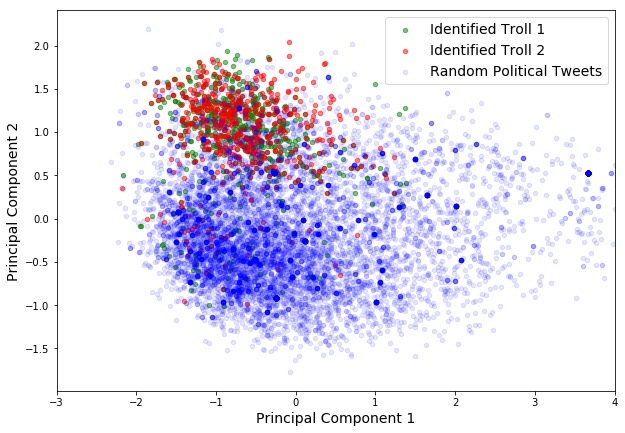

In [258]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
_ = plt.scatter(tfm_all_tweets[0:troll1,0], tfm_all_tweets[0:troll1,1],  s=20, alpha=0.5, color='green', label='Identified Troll 1')
_ = plt.scatter(tfm_all_tweets[troll1:(troll1 + troll2),0], tfm_all_tweets[troll1:(troll1 + troll2),1], s=20, alpha=0.5, color='red', label='Identified Troll 2')
# _ = plt.scatter(tfm_all_tweets[(troll1 + troll2):all_troll,0], tfm_all_tweets[(troll1 + troll2):all_troll,1], s=25, alpha=0.45, color='k', label='Identified Troll 3')
_ = plt.scatter(tfm_all_tweets[all_troll:,0], tfm_all_tweets[all_troll:,1], s=20, alpha=0.1, color='blue', label='Random Political Tweets')
_ = plt.legend(loc='best', fontsize=14)
_ = plt.xlabel('Principal Component 1', fontsize=14)
_ = plt.ylabel('Principal Component 2', fontsize=14)
_ = plt.xlim(-3, 4)

In [245]:
fig.savefig('embed_cloud2.png')